In [1]:
# Import necessary packages
import sys
import json
import h5py
import numpy as np
import matplotlib.pyplot as plt

from helpers import generate_data, update_data



Iter Cont     Iter Corr     Residual      Freq          Energy        Step          Beta          
0             0             1.2826e-01    0.0955        5.0861e-02                                
0             1             4.2430e-03    0.0955        1.9854e-02                                
0             2             9.4199e-07    0.0955        1.9376e-02                                


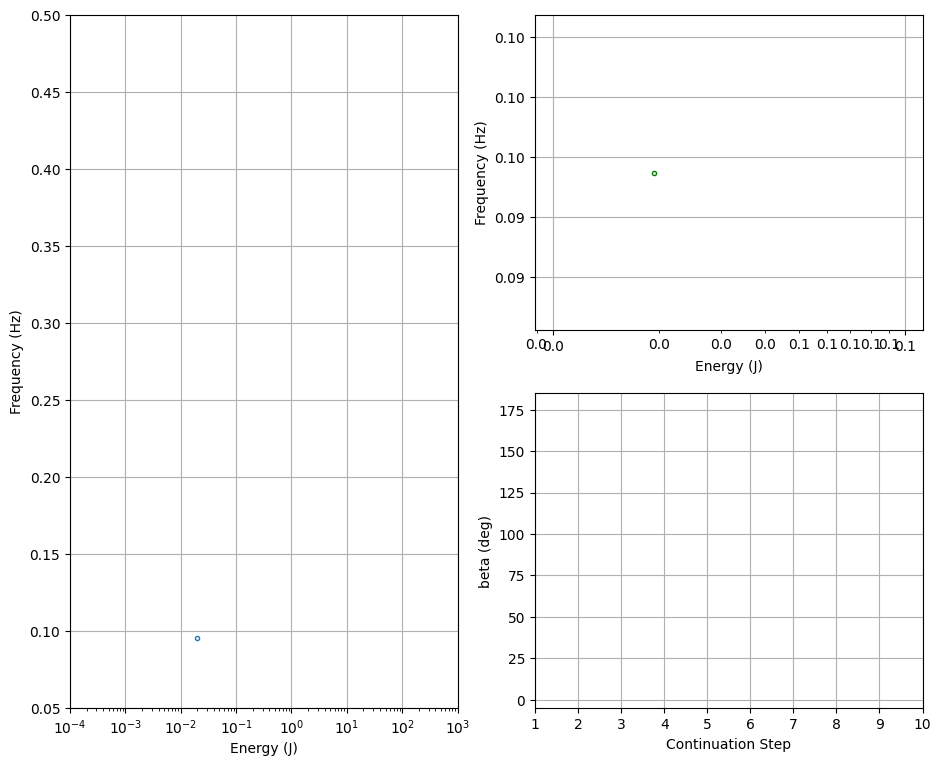

1             0             8.2709e-07    0.0955        1.9391e-02    -5.000e-03                  
1             1             1.9545e-13    0.0955        1.9392e-02    -5.000e-03    0.0022        
--------------------------------------------------------------------------------------------------
2             0             5.4762e-07    0.0956        1.9423e-02    -1.000e-02                  
2             1             1.2469e-13    0.0956        1.9423e-02    -1.000e-02    0.0039        
--------------------------------------------------------------------------------------------------
3             0             2.4981e-06    0.0958        1.9486e-02    -2.000e-02                  
3             1             9.3079e-14    0.0958        1.9485e-02    -2.000e-02    0.0093        
--------------------------------------------------------------------------------------------------
4             0             9.2769e-06    0.0962        1.9615e-02    -4.000e-02                  
4         

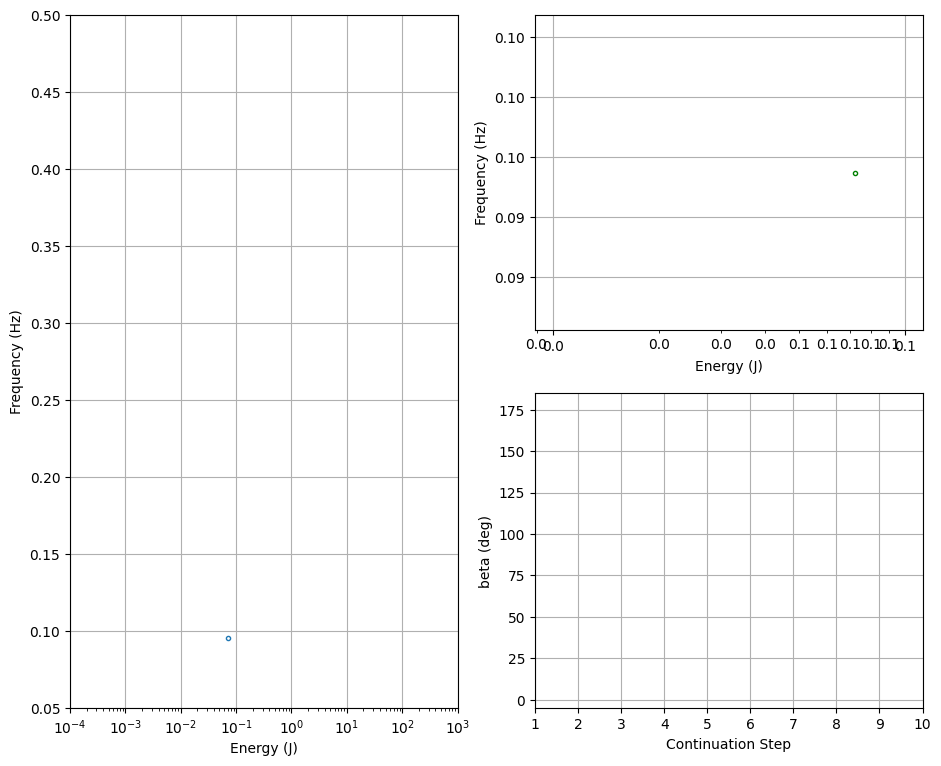

1             0             1.5961e-07    0.0955        7.2349e-02    -5.000e-03                  
1             1             1.5476e-14    0.0955        7.2349e-02    -5.000e-03    0.0030        
--------------------------------------------------------------------------------------------------
2             0             6.8819e-07    0.0956        7.2446e-02    -1.000e-02                  
2             1             7.0270e-14    0.0956        7.2446e-02    -1.000e-02    0.0068        
--------------------------------------------------------------------------------------------------
3             0             2.7120e-06    0.0958        7.2643e-02    -2.000e-02                  
3             1             1.6524e-12    0.0958        7.2642e-02    -2.000e-02    0.0129        
--------------------------------------------------------------------------------------------------
4             0             1.1607e-05    0.0962        7.3045e-02    -4.000e-02                  
4         

In [2]:
# Generate continuation data
generate_data('contparameters.json', 0.1, 1.0, 0.1, 0.5, 0.05)

In [3]:
update_data('FRF1')

|████████████████████████████████████████| 148/148 [100%] in 3.0s (48.55/s) 


In [4]:
# Get data file
file = "FRF1.h5"
data = h5py.File(str(file), "r")

In [5]:
# Position, Velocity & Acceleration
## Note: COL -> Number of Periods
pose = data["/Config_Time/POSE"][:].squeeze()
vel = data["/Config_Time/VELOCITY"][:].squeeze()
acc = data["/Config_Time/ACCELERATION"][:].squeeze()
time = data["/Config_Time/Time"][:].squeeze()
# Frequency of Periodic Solution
T = data["/T"][:]
n_solpoints = len(T)

In [6]:
# Forcing Amplitude of FRC --> F*cos(2pi/T*t + phi)
par = data["/Parameters"]
par = json.loads(par[()])
amp = par["forcing"]["amplitude"]
phase_ratio = par["forcing"]["phase_ratio"]

F = np.zeros_like(acc)
for i in range (n_solpoints):
    F[:, i] = amp * np.cos(2 * np.pi / T[i] * time[i, :] + phase_ratio)

Text(0, 0.5, 'Amplitude, $x$')

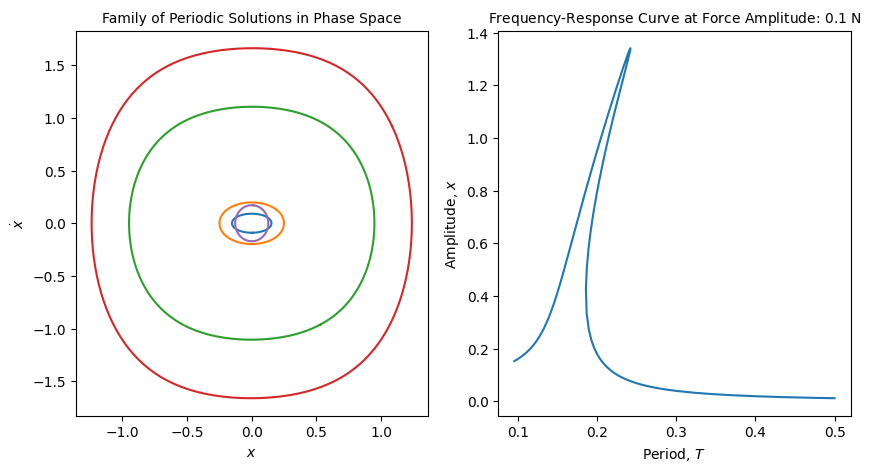

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot Family of Periodic Solutions in Phase Space
ax[0].set_title('Family of Periodic Solutions in Phase Space', fontsize=10)
ax[0].plot(pose[:, ::30], vel[:, ::30])
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$\dot{x}$')

# Plot NLFR
ax[1].set_title(f'Frequency-Response Curve at Force Amplitude: ${amp}$ N', fontsize=10)
ax[1].plot(1/T, np.max(pose, axis=0))
ax[1].set_xlabel(r'Period, $T$')
ax[1].set_ylabel(r'Amplitude, $x$')